# Problem statement

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

### Step1. Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step2. Creating & Reading the data

In [4]:
df=pd.read_csv(r"file:///C:/Users/shrey/OneDrive/Desktop/Imaritcus%20Notes/Python/Refactored_Py_DS_ML_Bootcamp-master/11-Linear-Regression/Ecommerce%20Customers")
df.sample(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
76,david43@richards.com,"967 Andrew Spurs\nMathistown, CO 28230",Indigo,33.555207,11.551821,36.628834,2.837943,444.285907
421,youngellen@hotmail.com,"994 Joel Highway Suite 216\nNew Jessicafort, U...",DodgerBlue,31.574138,12.941556,36.725277,4.560396,544.409272
155,aaron11@luna.com,"672 Jesus Roads Apt. 443\nThompsonland, WY 69228",LightSkyBlue,32.449522,13.457725,37.238806,2.941411,503.978379
493,nathan84@lowery.net,"01242 Stephanie Ways Suite 003\nChurchville, M...",MediumSeaGreen,32.060914,12.625433,35.539142,5.412358,627.603319
122,scastillo@hotmail.com,"0922 Gutierrez Loaf\nWattsbury, OH 96315",Moccasin,33.268330,11.113330,37.387946,4.018727,514.239521
154,nathan86@hotmail.com,"748 Michael Plaza\nWest Billyside, UT 20799",MidnightBlue,36.139662,12.050267,36.959643,3.864861,595.803819
56,gregoryholmes@hotmail.com,"2891 Martin Plain Suite 197\nMelaniestad, NE 6...",DarkSalmon,32.688229,13.761533,39.252931,2.995761,520.898794
480,christopher44@hotmail.com,"549 Anna Avenue\nPort Laura, CA 76209-9339",WhiteSmoke,34.238242,11.550300,35.769330,4.183144,551.023002
168,walkererica@scott.com,"86536 Barnes Track\nSouth Kyle, MT 21570-5606",MediumAquaMarine,33.644177,13.160020,36.407747,3.015175,506.536393
404,gomezalicia@hotmail.com,"506 Allison Cove Apt. 766\nWeeksstad, AS 71308",MediumSpringGreen,32.278443,12.527472,36.688367,3.531402,488.270298


### Step3. Data Exploration 

In [3]:
print(df.shape)
print(df.info())
print(df.dtypes)

(500, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None
Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object


### Step4. Check if there are missing values. If yes, handle them.

In [4]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
df.columns=["Email","Address","Avatar","Avgsessionlength","TimeonApp","TimeonWebsite","LengthofMembership","YearlyAmountSpent"]
df.head()

,Email,Address,Avatar,Avgsessionlength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Step5. Creating X & Y

In [44]:
X=df[['Avgsessionlength', 'TimeonApp',
       'TimeonWebsite', 'LengthofMembership']]
Y=df['YearlyAmountSpent']

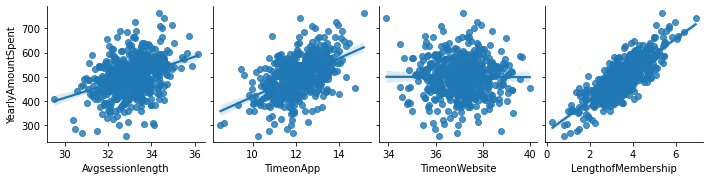

In [45]:
#Assumption 1: Assumption of linerarity: Every ind var sholud have a 
#linear relationship with the dep var

sns.pairplot(df,x_vars=["Avgsessionlength","TimeonApp","TimeonWebsite","LengthofMembership"],y_vars="YearlyAmountSpent",kind="reg")

In [46]:
print(X.shape)
print(Y.shape)

(500, 4)
(500,)


C:\Users\shrey\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearlyAmountSpent', ylabel='Density'>

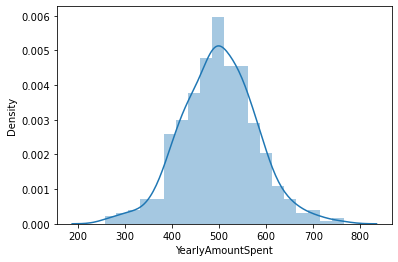

In [47]:
#Assumption of Normality 2: The dependent variable should follow an approximate normal distribution.
sns.distplot(Y)

In [48]:
#Asusumption of no multicollinearity 3:
corr_df=X.corr(method="pearson")
corr_df

,Avgsessionlength,TimeonApp,TimeonWebsite,LengthofMembership
Avgsessionlength,1.000000,-0.027826,-0.034987,0.060247
TimeonApp,-0.027826,1.000000,0.082388,0.029143
TimeonWebsite,-0.034987,0.082388,1.000000,-0.047582
LengthofMembership,0.060247,0.029143,-0.047582,1.000000


<AxesSubplot:>

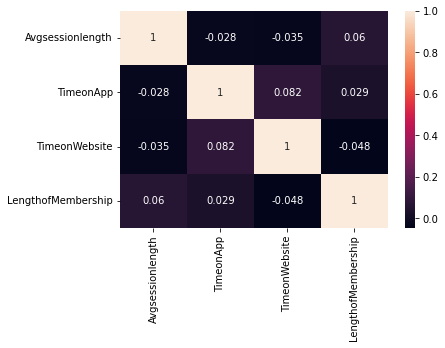

In [49]:
sns.heatmap(corr_df,annot=True)

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range((len(X.columns)))]
vif_df.round(2)

,features,VIF Factor
0,Avgsessionlength,613.19
1,TimeonApp,144.02
2,TimeonWebsite,658.50
3,LengthofMembership,13.58


In [51]:
from scipy.stats import skew
data_num_skew = X.apply(lambda i: skew(i.dropna()))
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
print(data_num_skew)
print(data_num_skewed)

Avgsessionlength     -0.032078
TimeonApp            -0.088854
TimeonWebsite         0.012105
LengthofMembership   -0.106288
dtype: float64
Series([], dtype: float64)


### Step6. Shuffle and Split Data

In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [53]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(400, 4)
(400,)
(100, 4)
(100,)


### Creating the model

In [54]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

### Training the model

In [55]:
lm.fit(X_train,Y_train)
print(lm.intercept_)
print(lm.coef_)

-1063.1760775809694
[25.84410197 38.67941217  0.64440855 61.81547319]


In [56]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=["Coeff"])
cdf

,Coeff
Avgsessionlength,25.844102
TimeonApp,38.679412
TimeonWebsite,0.644409
LengthofMembership,61.815473


1 unit increase in **Avg. Session Length** is associated with an **increase of \$25.844102**.
 
1 unit increase in **Time on App** is associated with an **increase of \$38.679412**.
 
1 unit increase in **Time on Website** is associated with an **increase of \$0.644409**

1 unit increase in **Length of Membership** is associated with an **increase of \$61.815473**

### Predicting the model

In [57]:
Y_pred=lm.predict(X_test)
Y_pred

array([685.70655938, 497.63380052, 599.64360371, 610.22271417,
       585.00948031, 478.43493551, 543.83262524, 575.61671765,
       753.07024358, 468.73480135, 506.7976312 , 559.2711521 ,
       553.61914368, 494.71655627, 531.01872089, 434.29492427,
       543.70444581, 562.7636641 , 421.59699769, 408.98854566,
       544.07874715, 450.74309986, 499.81877354, 507.53769613,
       693.93634304, 435.10415288, 527.84425312, 466.33172079,
       493.9761553 , 478.04387558, 563.69390249, 487.88588029,
       481.70767175, 508.4907605 , 515.48727739, 539.06658181,
       421.98733681, 472.03958081, 510.42751787, 507.43458839,
       503.21039247, 552.27642729, 642.43892034, 434.54716619,
       704.27974165, 607.12353   , 658.20257824, 766.6621823 ,
       577.17770743, 445.47796648, 473.94669074, 504.11068297,
       601.93512863, 491.30380457, 552.11313086, 489.62016949,
       429.50808414, 558.89460594, 431.98617697, 556.74887223,
       401.80537707, 421.46531986, 546.74423595, 564.97

In [60]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual_amount"]=Y_test
new_df["Predicted_amount"]=Y_pred
new_df
new_df=new_df.reset_index().drop("index",axis=1)
new_df

,Avgsessionlength,TimeonApp,TimeonWebsite,LengthofMembership,Actual_amount,Predicted_amount
0,32.887105,12.387184,37.431159,6.401229,684.163431,685.706559
1,34.370327,11.887800,37.861447,3.046620,491.911505,497.633801
2,36.139662,12.050267,36.959643,3.864861,595.803819,599.643604
3,34.713317,12.038808,37.635299,4.632461,612.385230,610.222714
4,32.439770,12.424130,38.948825,4.920318,573.306222,585.009480
...,...,...,...,...,...,...
95,33.256335,13.858062,37.780265,5.976768,725.584814,726.128433
96,33.108336,12.892375,36.527388,4.594117,614.729638,598.674675
97,32.820310,11.634893,35.368626,4.124585,507.441832,512.821228
98,32.597183,10.889567,38.212571,4.442054,488.786061,499.683078


<AxesSubplot:>

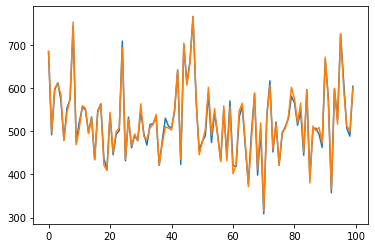

In [61]:
new_df["Actual_amount"].plot()
new_df["Predicted_amount"].plot()

### Evaluation

In [62]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE",rmse)

adjusted_r_squared= 1-(1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adjusted_r_square",adjusted_r_squared)

R-squared: 0.9882929974541985
RMSE 8.908636036162479
Adjusted_r_square 0.9881983954134244


In [63]:
print(Y_test.min())
print(Y_test.max())

308.52774655803336
765.5184619388372


In [64]:
new_df["Deviation"] = new_df["Actual_amount"]- new_df["Predicted_amount"]
new_df.head()

,Avgsessionlength,TimeonApp,TimeonWebsite,LengthofMembership,Actual_amount,Predicted_amount,Deviation
0,32.887105,12.387184,37.431159,6.401229,684.163431,685.706559,-1.543128
1,34.370327,11.887800,37.861447,3.046620,491.911505,497.633801,-5.722295
2,36.139662,12.050267,36.959643,3.864861,595.803819,599.643604,-3.839785
3,34.713317,12.038808,37.635299,4.632461,612.385230,610.222714,2.162516
4,32.439770,12.424130,38.948825,4.920318,573.306222,585.009480,-11.703258


In [65]:
new_df=pd.DataFrame()
new_df=X_train.copy()

new_df["YearlyAmountSpent"]=Y_train.copy()
new_df.shape

(400, 5)

In [67]:
import statsmodels.formula.api as sm

#create a fitted model with all three features
lm_model = sm.ols(formula="YearlyAmountSpent ~ Avgsessionlength + TimeonApp + TimeonWebsite + LengthofMembership",
                 data=new_df).fit()

print(lm_model.params)
print(lm_model.summary())

Intercept            -1063.176078
Avgsessionlength        25.844102
TimeonApp               38.679412
TimeonWebsite            0.644409
LengthofMembership      61.815473
dtype: float64
                            OLS Regression Results                            
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5607.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:07:17   Log-Likelihood:                -1495.4
No. Observations:                 400   AIC:                             3001.
Df Residuals:                     395   BIC:                             3021.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         

In [69]:
y_pred_new=lm_model.predict(X_test)

In [75]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)


R-squared: 0.9882929974541984
RMSE: 8.908636036162505
Adj R-square: 0.9881983954134242
